In [10]:
import numpy as np

import random

def getD(G): 
    V = G.vertices()
    D = [None] + [(v,w,i) for v in V for w in G.neighbors(v) for i in [0,1]]
    return D

def twisted_faces2(G, do_twist=True):
    """
      Now for general G. 
    """ 
    V = G.vertices()
    D = getD(G)
    Rlist = []
    for v in V:
        N = G.neighbors(v)
        d = len(N)
        random.shuffle(N)
        for x,y in zip(N,N[1:]+[N[0]]):
            Rlist.append((D.index((v,x,1)),D.index((v,y,0))))
            print(Rlist)
    R = Permutation(Rlist)
    print("R = ", R)
    Llist = []
    E = G.edges(labels=None)
    if do_twist:
        twists = [random.randint(0,1) for _ in E]
    else:
        twists = [1 for _ in E]
    for (u,v),t in zip(E,twists):
        Llist.append((D.index((u,v,0)),D.index((v,u,t))))
        Llist.append((D.index((u,v,1)),D.index((v,u,(t+1)%2))))
        print(Llist)

        #Llist.append(((u,v,1),(v,u,(t+1)%2)))
        #Llist.append(None)
    L = Permutation(Llist)
    print("L = ", L)
    print("twisted_faces = ", R*L)    
    return R*L #, R, L, D

def sample_number_of_twisted_faces(G,samples=10,do_twist=True):
    return [len(twisted_faces2(G,do_twist=do_twist).cycle_type())/2 for _ in range(samples)]

def exp_size(L):
    return sum(L)/len(L)

def equal(e,f):
    return set(e[0:2])==set(f[0:2])


def count_bad(G,do_twist=True):
    D = getD(G)
    F = twisted_faces2(G,do_twist=do_twist)
    bad = 0
    for face in F.cycle_tuples():
        edges = [tuple(sorted(D[x][:2])) for x in face]
        bad += len(edges) - len(set(edges))
        
    return bad/2
    
def sample_number_of_bad_edges(G,do_twist=True,samples=100):
    CDC = 0
    L = []
    for i in range (samples):
        if count_bad(G,do_twist=do_twist) == 0:
            CDC += 1
        L.append(count_bad(G,do_twist=do_twist))
    return L


def number_of_CDC(G,do_twist=True,samples=10):
    CDC = 0
    L = []
    for i in range (samples):
        if count_bad(G,do_twist=do_twist) == 0:
            CDC += 1
        L.append(count_bad(G,do_twist=do_twist))
    return CDC


def check_tw_faces(G):
    F,R,L,D = twisted_faces2(G)
    print(list(zip(D,range(100))))
    C = F.cycle_tuples()
    m = G.num_edges()
    assert(len(D) == 4*m+1)
    U = reduce(lambda x,y: x.union(y), [set(x) for x in C], set([]))
    assert(len(U) == 4*m)
    print(R.cycle_tuples())
    for vert in R.cycle_tuples():
        for x in vert:
            print(D[x])
        print('--')
    print('\n ===== \n')

    print(L.cycle_tuples())
    for edge in L.cycle_tuples():
        for x in edge:
            print(D[x])
        print('--')            

    print('\n ===== \n')
    print(F.cycle_tuples())
    for face in C:
        for d in face:
            print(D[d])

def twisted_faces3(G, do_twist=True):
    """
      Now for general G. 
    """ 
    V = G.vertices()
    D = getD(G)
    Rlist = []
    for v in V:
        N = G.neighbors(v)
        d = len(N)
        random.shuffle(N)
        for x,y in zip(N,N[1:]+[N[0]]):
            Rlist.append((D.index((v,x,1)),D.index((v,y,0))))
    R = Permutation(Rlist)
    Llist = []
    E = G.edges(labels=None)
    if do_twist:
        twists = [random.randint(0,1) for _ in E]
    else:
        twists = [1 for _ in E]
    for (u,v),t in zip(E,twists):
        Llist.append((D.index((u,v,0)),D.index((v,u,t))))
        Llist.append((D.index((u,v,1)),D.index((v,u,(t+1)%2))))

        #Llist.append(((u,v,1),(v,u,(t+1)%2)))
        #Llist.append(None)
    L = Permutation(Llist)  
    return R*L #, R, L, D






def sample_number_of_twisted_faces3(G,samples=10,do_twist=True):
    return [len(twisted_faces3(G,do_twist=do_twist).cycle_type())/2 for _ in range(samples)]

def exp_size(L):
    return sum(L)/len(L)

def equal(e,f):
    return set(e[0:2])==set(f[0:2])


def count_bad3(G,do_twist=True):
    D = getD(G)
    F = twisted_faces3(G,do_twist=do_twist)
    bad = 0
    for face in F.cycle_tuples():
        edges = [tuple(sorted(D[x][:2])) for x in face]
        bad += len(edges) - len(set(edges))
        
    return bad/2
    
def sample_number_of_bad_edges3(G,do_twist=True,samples=100):
    CDC = 0
    L = []
    for i in range (samples):
        if count_bad3(G,do_twist=do_twist) == 0:
            CDC += 1
        L.append(count_bad3(G,do_twist=do_twist))
    return L


def number_of_CDC3(G,do_twist=True,samples=10):
    CDC = 0
    L = []
    for i in range (samples):
        if count_bad3(G,do_twist=do_twist) == 0:
            CDC += 1
        L.append(count_bad3(G,do_twist=do_twist))
    return CDC


def change_tuple(x,y):
    L = (x,y)
    L = list(L)
    L.reverse()
    return tuple(L)


def Faces(G,do_twist=True):
    D = getD(G)
    F = twisted_faces3(G,do_twist=do_twist)
    bad = 0
    L = []
    for face in F.cycle_tuples():
        edges = [tuple(sorted(D[x][:2])) for x in face]
        bad += len(edges) - len(set(edges))
        E = edges    
        E.append(E[0])
        for i in range(1, (len(E)-1)):
            (x,y) = E[i+1]
            for j in range(2):
                if E[i][1] != E[i+1][0]:
                    E[i+1] = change_tuple(x,y)
        E.remove(E[0])
        L.append(E)
    return L

def Num_Bad_Pos_Neg(G ,do_twist=True):
    
    L = Faces(G,do_twist=do_twist)

    Bad_Neg = 0
    List_Bad_Neg = []
    for k in range (len(L)):
        for i in range(len(L[k])):
            for j in range(i+1, len(L[k])):
                if L[k][i][0] == L[k][j][0]:
                    if L[k][i][1] == L[k][j][1]:
                        Bad_Neg += 1
    print("Bad Negative = ", Bad_Neg/2)
    Bad_Pos = 0
    List_Bad_Pos = []
    for k in range (len(L)):
        for i in range(len(L[k])):
            for j in range(i+1, len(L[k])):
                if L[k][i][0] == L[k][j][1]:
                    if L[k][i][1] == L[k][j][0]:
                        Bad_Pos += 1
    print("Bad Positive = ", Bad_Pos/2)
    return Bad_Neg/2, Bad_Pos/2


def Num_Bad_Pos_Neg1(G ,do_twist=True):
    
    L = Faces(G,do_twist=do_twist)

    Bad_Neg = 0
    List_Bad_Neg = []
    for k in range (len(L)):
        for i in range(len(L[k])):
            for j in range(i+1, len(L[k])):
                if L[k][i][0] == L[k][j][0]:
                    if L[k][i][1] == L[k][j][1]:
                        Bad_Neg += 1
    Bad_Pos = 0
    List_Bad_Pos = []
    for k in range (len(L)):
        for i in range(len(L[k])):
            for j in range(i+1, len(L[k])):
                if L[k][i][0] == L[k][j][1]:
                    if L[k][i][1] == L[k][j][0]:
                        Bad_Pos += 1
    return Bad_Neg/2, Bad_Pos/2


def List_Bad_Pos_Neg(G ,do_twist=True):
    L = list(Num_Bad_Pos_Neg1(G ,do_twist=do_twist))
    return L


def exp_number_of_Bad_Neg_Pos(G,samples=10,do_twist=True):
    Neg = []
    Pos = []
    for i in range (samples):
        L = List_Bad_Pos_Neg(G,samples)
        Neg.append(L[0])
        Pos.append(L[1])
    return [exp_size(Neg).n(20), exp_size(Pos).n(20)]

In [233]:
G = graphs.CompleteGraph(4)

In [234]:
Num_Bad_Pos_Neg(G ,do_twist=True)

Bad Negative =  1
Bad Positive =  1


(1, 1)

In [235]:
Num_Bad_Pos_Neg(G ,do_twist=True)

Bad Negative =  1
Bad Positive =  0


(1, 0)

In [236]:
Num_Bad_Pos_Neg(G ,do_twist=True)

Bad Negative =  2
Bad Positive =  1


(2, 1)

In [237]:
Num_Bad_Pos_Neg(G ,do_twist=True)

Bad Negative =  2
Bad Positive =  1


(2, 1)

In [238]:
Num_Bad_Pos_Neg(G ,do_twist=True)

Bad Negative =  1
Bad Positive =  0


(1, 0)

In [239]:
Num_Bad_Pos_Neg(G ,do_twist=True)

Bad Negative =  1
Bad Positive =  1


(1, 1)

In [240]:
Num_Bad_Pos_Neg(G ,do_twist=True)

Bad Negative =  1
Bad Positive =  1


(1, 1)

In [241]:
Num_Bad_Pos_Neg(G ,do_twist=True)

Bad Negative =  1
Bad Positive =  1


(1, 1)

In [242]:
Num_Bad_Pos_Neg(G ,do_twist=True)

Bad Negative =  2
Bad Positive =  1


(2, 1)

In [243]:
Num_Bad_Pos_Neg(G ,do_twist=True)

Bad Negative =  2
Bad Positive =  1


(2, 1)

In [244]:
pt = graphs.PetersenGraph()

In [245]:
Num_Bad_Pos_Neg(pt ,do_twist=True)

Bad Negative =  6
Bad Positive =  9


(6, 9)

In [246]:
Num_Bad_Pos_Neg(pt ,do_twist=True)

Bad Negative =  10
Bad Positive =  5


(10, 5)

In [247]:
Num_Bad_Pos_Neg(pt ,do_twist=True)

Bad Negative =  3
Bad Positive =  3


(3, 3)

In [248]:
Num_Bad_Pos_Neg(pt ,do_twist=True)

Bad Negative =  8
Bad Positive =  7


(8, 7)

In [249]:
Num_Bad_Pos_Neg(pt ,do_twist=True)

Bad Negative =  6
Bad Positive =  9


(6, 9)

In [250]:
Num_Bad_Pos_Neg(pt ,do_twist=True)

Bad Negative =  5
Bad Positive =  10


(5, 10)

In [251]:
Num_Bad_Pos_Neg(pt ,do_twist=True)

Bad Negative =  4
Bad Positive =  3


(4, 3)

In [252]:
Num_Bad_Pos_Neg(pt ,do_twist=True)

Bad Negative =  6
Bad Positive =  9


(6, 9)

In [253]:
Num_Bad_Pos_Neg(pt ,do_twist=True)

Bad Negative =  7
Bad Positive =  3


(7, 3)

In [254]:
B1 = graphs.BlanusaFirstSnarkGraph()
B2 = graphs.BlanusaSecondSnarkGraph()

In [255]:
Num_Bad_Pos_Neg(B1 ,do_twist=True)

Bad Negative =  7
Bad Positive =  0


(7, 0)

In [256]:
Num_Bad_Pos_Neg(B1 ,do_twist=True)

Bad Negative =  16
Bad Positive =  11


(16, 11)

In [257]:
Num_Bad_Pos_Neg(B1 ,do_twist=True)

Bad Negative =  2
Bad Positive =  5


(2, 5)

In [258]:
Num_Bad_Pos_Neg(B1 ,do_twist=True)

Bad Negative =  6
Bad Positive =  3


(6, 3)

In [259]:
Num_Bad_Pos_Neg(B1 ,do_twist=True)

Bad Negative =  0
Bad Positive =  6


(0, 6)

In [260]:
Num_Bad_Pos_Neg(B1 ,do_twist=True)

Bad Negative =  13
Bad Positive =  14


(13, 14)

In [261]:
Num_Bad_Pos_Neg(B1 ,do_twist=True)

Bad Negative =  14
Bad Positive =  13


(14, 13)

In [262]:
Num_Bad_Pos_Neg(B1 ,do_twist=True)

Bad Negative =  14
Bad Positive =  13


(14, 13)

In [263]:
Num_Bad_Pos_Neg(B2 ,do_twist=True)

Bad Negative =  16
Bad Positive =  11


(16, 11)

In [264]:
Num_Bad_Pos_Neg(B2 ,do_twist=True)

Bad Negative =  10
Bad Positive =  11


(10, 11)

In [265]:
Num_Bad_Pos_Neg(B2 ,do_twist=True)

Bad Negative =  2
Bad Positive =  3


(2, 3)

In [266]:
Num_Bad_Pos_Neg(B2 ,do_twist=True)

Bad Negative =  7
Bad Positive =  5


(7, 5)

In [267]:
Num_Bad_Pos_Neg(B2 ,do_twist=True)

Bad Negative =  3
Bad Positive =  2


(3, 2)

In [268]:
Num_Bad_Pos_Neg(B2 ,do_twist=True)

Bad Negative =  12
Bad Positive =  7


(12, 7)

In [269]:
Num_Bad_Pos_Neg(B2 ,do_twist=True)

Bad Negative =  17
Bad Positive =  10


(17, 10)

In [270]:
Num_Bad_Pos_Neg(B2 ,do_twist=True)

Bad Negative =  14
Bad Positive =  13


(14, 13)

In [271]:
Num_Bad_Pos_Neg(B2 ,do_twist=True)

Bad Negative =  14
Bad Positive =  13


(14, 13)

In [272]:
R1 = graphs.RandomRegular(3,20)

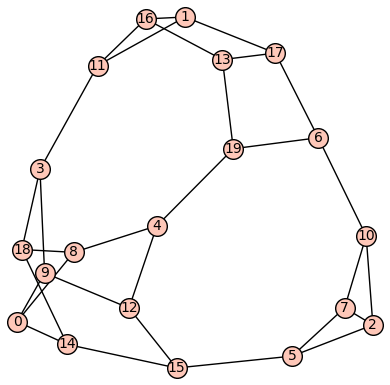

False

In [279]:
R1.show()
R1.is_edge_transitive()

In [280]:
Num_Bad_Pos_Neg(R1 ,do_twist=True)

Bad Negative =  12
Bad Positive =  10


(12, 10)

In [281]:
Num_Bad_Pos_Neg(R1 ,do_twist=True)

Bad Negative =  11
Bad Positive =  19


(11, 19)

In [282]:
Num_Bad_Pos_Neg(R1 ,do_twist=True)

Bad Negative =  6
Bad Positive =  9


(6, 9)

In [283]:
Num_Bad_Pos_Neg(R1 ,do_twist=True)

Bad Negative =  5
Bad Positive =  8


(5, 8)

In [284]:
Num_Bad_Pos_Neg(R1 ,do_twist=True)

Bad Negative =  16
Bad Positive =  11


(16, 11)

In [285]:
R2 = graphs.RandomRegular(3,50)

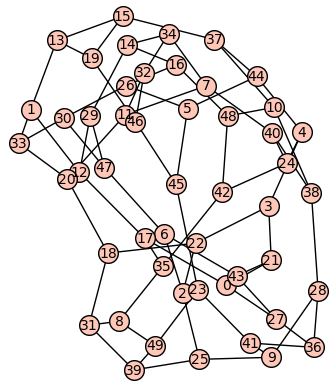

In [286]:
R2.show()

In [287]:
Num_Bad_Pos_Neg(R2 ,do_twist=True)

Bad Negative =  36
Bad Positive =  28


(36, 28)

In [288]:
Num_Bad_Pos_Neg(R2 ,do_twist=True)

Bad Negative =  44
Bad Positive =  31


(44, 31)

In [289]:
Num_Bad_Pos_Neg(R2 ,do_twist=True)

Bad Negative =  16
Bad Positive =  13


(16, 13)

In [290]:
Num_Bad_Pos_Neg(R2 ,do_twist=True)

Bad Negative =  20
Bad Positive =  10


(20, 10)

In [291]:
Num_Bad_Pos_Neg(R2 ,do_twist=True)

Bad Negative =  41
Bad Positive =  34


(41, 34)

In [292]:
Num_Bad_Pos_Neg(R2 ,do_twist=True)

Bad Negative =  20
Bad Positive =  13


(20, 13)

In [293]:
Num_Bad_Pos_Neg(R2 ,do_twist=True)

Bad Negative =  18
Bad Positive =  19


(18, 19)

In [294]:
Num_Bad_Pos_Neg(R2 ,do_twist=True)

Bad Negative =  24
Bad Positive =  18


(24, 18)

In [295]:
Num_Bad_Pos_Neg(R2 ,do_twist=True)

Bad Negative =  17
Bad Positive =  17


(17, 17)

In [296]:
Num_Bad_Pos_Neg(R2 ,do_twist=True)

Bad Negative =  7
Bad Positive =  9


(7, 9)

In [140]:
G1 = graphs.CompleteGraph(4)

In [133]:
print(exp_number_of_Bad_Neg_Pos(G1,samples=1000,do_twist=True))

[2.1660, 1.6930]


In [134]:
print(exp_number_of_Bad_Neg_Pos(G1,samples=1000,do_twist=True))

[2.1420, 1.6910]


In [135]:
print(exp_number_of_Bad_Neg_Pos(G1,samples=1000,do_twist=True))

[2.1690, 1.6920]


In [136]:
print(exp_number_of_Bad_Neg_Pos(G1,samples=1000,do_twist=True))

[2.2640, 1.7490]


In [147]:
print(exp_number_of_Bad_Neg_Pos(G1,samples=100000,do_twist=True))

[2.1602, 1.6945]


In [141]:
pt = graphs.PetersenGraph()

In [142]:
print(exp_number_of_Bad_Neg_Pos(pt,samples=100,do_twist=True))

[4.9300, 5.0500]


In [149]:
print(exp_number_of_Bad_Neg_Pos(pt,samples=1000,do_twist=True))

[5.0400, 4.5470]


In [150]:
print(exp_number_of_Bad_Neg_Pos(pt,samples=1000,do_twist=True))

[5.1810, 4.6130]


In [151]:
print(exp_number_of_Bad_Neg_Pos(pt,samples=10000,do_twist=True))

[5.1815, 4.6503]


In [152]:
B1 = graphs.BlanusaFirstSnarkGraph()

In [153]:
print(exp_number_of_Bad_Neg_Pos(B1,samples=100,do_twist=True))

[8.3900, 8.5000]


In [154]:
print(exp_number_of_Bad_Neg_Pos(B1,samples=1000,do_twist=True))

[9.1730, 8.6570]


In [155]:
print(exp_number_of_Bad_Neg_Pos(B1,samples=10000,do_twist=True))

[9.1417, 8.7099]


In [156]:
print(exp_number_of_Bad_Neg_Pos(B1,samples=100000,do_twist=True))

[9.1567, 8.6770]


In [157]:
B2 = graphs.BlanusaSecondSnarkGraph()

In [158]:
print(exp_number_of_Bad_Neg_Pos(B2,samples=100,do_twist=True))

[9.1700, 8.8700]


In [159]:
print(exp_number_of_Bad_Neg_Pos(B2,samples=1000,do_twist=True))

[9.1430, 8.4900]


In [160]:
print(exp_number_of_Bad_Neg_Pos(B2,samples=10000,do_twist=True))

[9.1748, 8.5750]


In [161]:
print(exp_number_of_Bad_Neg_Pos(B2,samples=100000,do_twist=True))

[9.1556, 8.6414]


In [11]:
R1 = graphs.RandomRegular(3, 100)

In [12]:
print(exp_number_of_Bad_Neg_Pos(R1,samples=100,do_twist=True))

[49.560, 47.040]


In [13]:
print(exp_number_of_Bad_Neg_Pos(R1,samples=1000,do_twist=True))

[50.276, 49.915]


In [14]:
print(exp_number_of_Bad_Neg_Pos(R1,samples=10000,do_twist=True))

KeyboardInterrupt: 

In [19]:
C = graphs.CycleGraph(21)
P = graphs.PathGraph(2)
G = P.cartesian_product(C)

In [49]:
print(exp_number_of_Bad_Neg_Pos(G,samples=1000,do_twist=True))

[15.312, 14.926]


In [47]:
def binary_tree(n):
    T = Graph(n)
    for k in range(1,n):
        T.add_edge((k,int(k/2)))
    T.delete_vertex(0)
    return T


def two_trees(n):
    T = binary_tree(n)
    G = T.disjoint_union(T)
    G.add_edge( ((0,1), (1,1)))
    
    for k in range(n/2,n):
        G.add_edge(((0,k),(1,k)))
        l = k+1
        if l==n: l=n/2
        G.add_edge(((0,k),(1,l)))
        
    return G

In [48]:
G = two_trees(16); G

Graph on 15 vertices disjoint_union Graph on 15 vertices: Graph on 30 vertices (use the .plot() method to plot)

In [171]:
R2 = graphs.RandomRegular(3, 50)

In [172]:
print(exp_number_of_Bad_Neg_Pos(R2,samples=100,do_twist=True))

[26.540, 25.920]


In [173]:
print(exp_number_of_Bad_Neg_Pos(R2,samples=1000,do_twist=True))

[25.152, 25.002]


In [169]:
print(exp_number_of_Bad_Neg_Pos(R2,samples=10000,do_twist=True))

[25.164, 24.594]


In [4]:
R3 = graphs.RandomRegular(3, 120)

In [175]:
print(exp_number_of_Bad_Neg_Pos(R3,samples=100,do_twist=True))

[58.070, 57.260]


In [8]:
print(exp_number_of_Bad_Neg_Pos(R3,samples=1000,do_twist=True))

[59.602, 59.546]


In [3]:
R4 = graphs.RandomRegular(3, 60)

In [9]:
print(exp_number_of_Bad_Neg_Pos(R4,samples=1000,do_twist=True))

[30.385, 29.639]
